#**Momento de Retroalimentación: Módulo 1 Utilización, procesamiento y visualización de grandes volúmenes de datos (Portafolio Análisis)**

Entregable: Uso, procesamiento y visualización de grandes volúmenes de datos..

##**Descripción del Dataset**

**¿De que trata?**

El dataset que se utilizara para este proyecto **registra los trayectos realizados por taxis en la ciudad de Nueva York.** Incluye información de viajes individuales con detalles como tiempos de inicio y fin, número de pasajeros, distancia recorrida, tarifas, propinas, tipo de pago, y zonas de recogida y bajada. El tamaño total de los archivos CSV originales (para ciertos años) es aproximadamente **1.99 GB**.

**Fuente del dataset**

Los datos provienen de la Taxi & Limousine Commission (TLC) de Nueva York, que publica registros de viaje en su sitio web, en este caso el dataset se descargo desde la **plataforma de Kaggle**: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data/data

**Estructura y composición**

- Cada fila representa un viaje individual del taxi.
- Columnas incluidas:
  - **VendorID:** identificador para registrar el viaje.
  - **tpep_pickup_datetime y tpep_dropoff_datetime:** fechas y horas de inicio y fin del viaje.
  - **passenger_count:** número de pasajeros.
  - **trip_distance:** distancia recorrida en millas.
  - También hay tarifa **(fare_amount)**, propina **(tip_amount)**, peajes **(tolls_amount)**, el total **(total_amount)**, tipo de pago **(payment_type)**, longitud y latitud del punto donde se inicio y donde termino el viaje.
- Los datos están organizados por mes y año.
- Este dataset tiene un total de **12,748,986 rows y 19 columns**

##**1. Configura correctamente tu entorno de trabajo en Colab para utilizar PySpark**

Primero lo que tenemos que hacer es configurar la sesion de Colab para que funcione correctamente PySpark

In [1]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.7/spark-3.5.7-bin-hadoop3.tgz
!tar xf spark-3.5.7-bin-hadoop3.tgz
#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.7-bin-hadoop3"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

#Probando PySparl
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark = SparkSession \
       .builder \
       .appName("Spark Portafolio") \
       .getOrCreate()

spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://cli.github.com/packages stable/main amd64 Packages [343 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,145 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,828 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Pack

##**2. Una vez configurado tu ambiente de trabajo selecciona una base de datos que se caracterice por tener un gran volumen de datos.**

Ahora abrimos la sesion de drive para poder obtener el dataset que queremos usar para el modelo.

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Mounted at /content/gdrive
/content


In [7]:
%cd "/content/gdrive/MyDrive/ESCUELA/IRS/7MO/IA-2/Modulo-1.2/EVIDENCIA/Datos"
!ls  # show current directory

/content/gdrive/MyDrive/ESCUELA/IRS/7MO/IA-2/Modulo-1.2/EVIDENCIA/Datos
nyc_taxi_tripdata_2015.csv  spark-3.5.7-bin-hadoop3


###**Uso de libreria pandas para buscar correlaciones de los datos**

El objetivo de usar pandas es para entender un poco los datos que tenemos y saber si esta base de deatos sera util.

In [8]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/ESCUELA/IRS/7MO/IA-2/Modulo-1.2/EVIDENCIA/Datos/nyc_taxi_tripdata_2015.csv")

Aqui simplemente observamos cuales son los atributos con los que se pueden trabajar y cual seria el target a predecir.

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.00,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.80,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.40,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.30,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55


Ahora queremos desplegar información sobre el tipo de dato que son los atributos para saber si es necesario hacer alguna transformación o similar para poder implementar los atributos dentro del modelo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


Ahora lo que queremos encontrar es la relación que tiene los atributos entre ellos, pero para esto primero debemos limpiar un poco este dataset. En este caso lo primero que se hace es eliminar todas las observaciones que contengan datos nulos que puedan afectar la busqueda de correlaciones significativas.

In [ ]:
df = df.dropna()

Ahora lo que hacemos es quitar los atributos que son de tipo "String", debido a que no podemos buscar correlaciones en datos de este  tipo, asi que solo buscaremos correlaciones de los demas atributos.

In [ ]:
df_clean = df.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime", "RateCodeID", "store_and_fwd_flag"], axis=1)

Imprimimos una matriz de correlacion para saber como se comportan los atributos entre ellos.

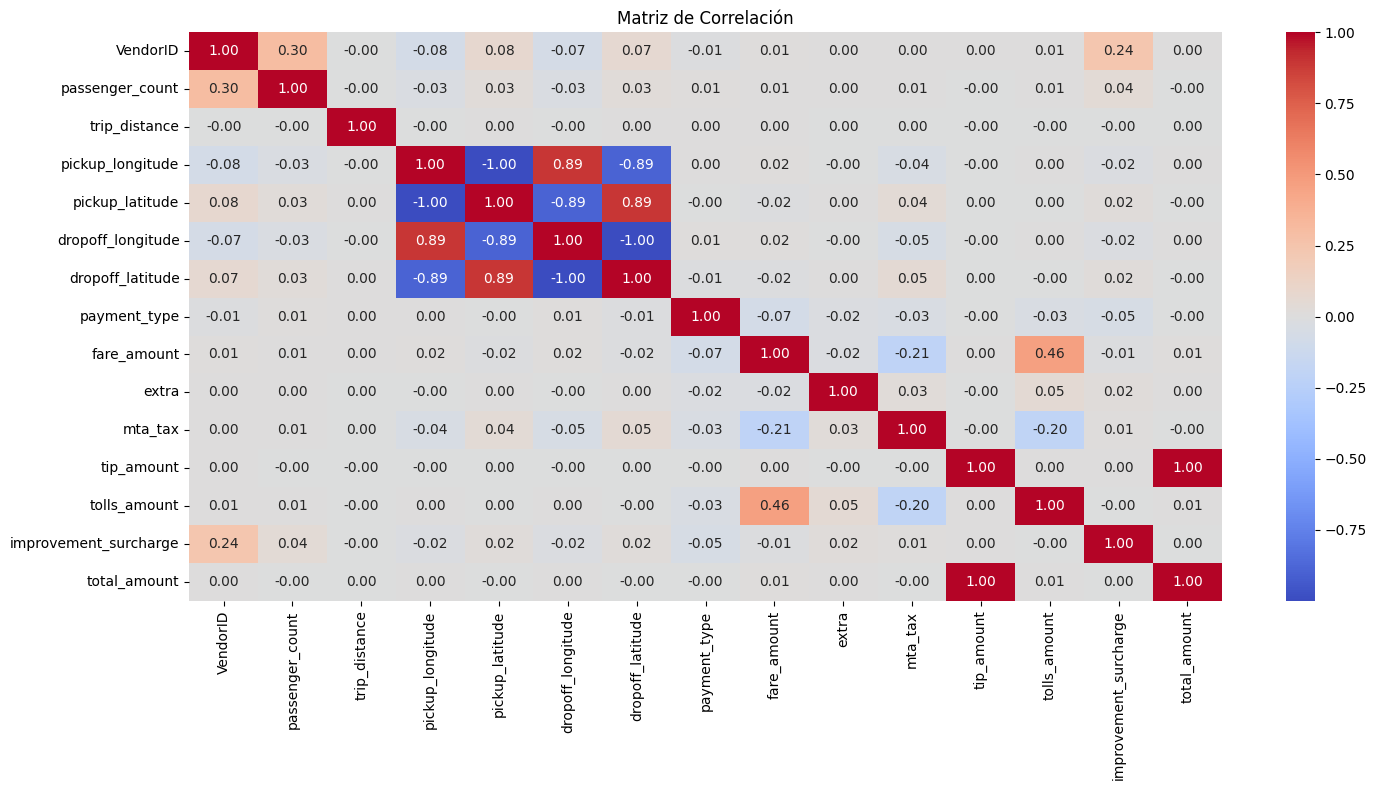

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_clean.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Con esto podemos saber que es necesario hacer transformaciones como atributos derivados que nos permitan hacer un modelo funcional con los datos.

##**3. Utilizando MLlib genera un modelo inteligente de clasificación, regresión o agrupamiento con la base de datos que seleccionaste**

###**Uso de PySpark**

Iniciamos la sesion del PySpark para poder trabajar con ella en la base de datos y en el modelo.

In [ ]:
spark = SparkSession \
       .builder \
       .appName("Spark Portafolio") \
       .getOrCreate()

spark

Descargamos la base de datos que tiene un tamaño aprox. de 1.85 GB, esto para poder trabaja con grandes volumenes de datos.

In [ ]:
df = spark.read.csv("/content/gdrive/MyDrive/ESCUELA/IRS/7MO/IA-2/Modulo-1.2/Datos/nyc_taxi_tripdata_2015.csv", header=True, inferSchema=True)

Imprimimos los datos para nuevamente ver que atributos tenemos y como se ven desplegados de manera tabular.

In [ ]:
df.show()

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|RateCodeID|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|       2| 2015-01-15 19:05:39|  2015-01-15 19:23:42|              1|         1.59|  -73.993896484375|  40.7501106262207|         1|    

nuevamente imprimimos información del tipo de dato que es cada uno de los atributos para saber cuales seran las transformaciones necesarias para cada atributo.

In [ ]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- RateCodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)



###**Tratamiento y preparacion de los datos (ETL)**

####**Eliminacion de valores nulos**

Una de las primeras cosas que se debe hacer en el tratamiento de los datos es eliminar los valores nulos debido a que no aportan ninguna información relevante al modelo y pueden a veces llegar a provocar un error en la compilación o incluso afectar las predicciones del modelo.

In [ ]:
df.na.drop().show()

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|RateCodeID|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|       2| 2015-01-15 19:05:39|  2015-01-15 19:23:42|              1|         1.59|  -73.993896484375|  40.7501106262207|         1|    

####**Creacion de atributos derivados**

A partir de los atributos que tenemos podemos agrupar, separar o crear nuevos atributos que ayuden al modelo a tener mas variables para mejorar las predicciones.

Una de las primeras cosas que hacemos sera agrupar todos los pequeños montos que se despliegan en un solo atributo pero dejando las propinas por separado para poder saber cuanto fue el costo del viaje. En este caso este nuevo atributo `trip_cost` servira para ser el target del modelo, es decir, lo que vamos a querer predecir a partir de los valores de los demas atributos.

In [ ]:
df_new = df.withColumn('trip_cost', df['fare_amount']+df['extra']+df['mta_tax']+df['tolls_amount']+df['improvement_surcharge'])
df_new.show()

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|RateCodeID|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|         trip_cost|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+------------------+
|       2| 2015-01-15 19:05:39|  2015-01-15 19:23:42|              1|         1

Para este caso lo que haremos es extraer el dia de la semana, la hora y el minuto en el que se realizo el pickup del cliente para el viaje correspondiente y asi poder saber si la hora y el dia en el que se realizo el viaje influye en el precio final del viaje.

In [ ]:
from pyspark.sql import functions as F

df_new = (
    df_new
    .withColumn("pickup_dayweek", F.dayofweek("tpep_pickup_datetime"))    # Día de la semana (1=domingo)
    .withColumn("pickup_hour", F.hour("tpep_pickup_datetime"))        # Hora de 0hrs a 23hrs
    .withColumn("pickup_minute", F.minute("tpep_pickup_datetime")))    # Minuto de 0min a 59min

Ahora vamos a generar atributos derivados a partir de operaciones entre otros atributos.

En este primero lo que queremos es sacar la duración del viaje para saber cuanto tiempo tardo el viaje en total y tener `trip_duration` en minutos que duro el viaje.

In [ ]:
df_new = (df_new.withColumn("trip_duration",(F.col("tpep_dropoff_datetime").cast("long") - F.col("tpep_pickup_datetime").cast("long")) / 60.0))

Ahora usando el atributo recien derivado, `trip_duration`, hacemos la division de `trip_distance` / `trip_duration` para poder sacar a que velocidad, en promedio, el vehiculo fue durante todo el trayecto del viaje.

In [ ]:
df_new = df_new.withColumn("avg_speed", F.col("trip_distance") / (F.col("trip_duration") / 60))

Desplegamos nuevamente la base de datos con los nuevos atributos agregados.

In [ ]:
df_new.show()

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+------------------+--------------+-----------+-------------+------------------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|RateCodeID|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|         trip_cost|pickup_dayweek|pickup_hour|pickup_minute|     trip_duration|         avg_speed|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+

Volvemos a imprimir el tipo de datos que son para saber como se encuentran los atributos actuales.

In [ ]:
df_new.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- RateCodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- trip_cost: double (nullable = true)
 |-- pickup_dayweek: integer (nullable = true)
 |-- pickup_hour: integer (nul

####**Delimitar valores**

Otra de las cosas que es indispensable hacer para la preparacion de los datos es quitar o cambiar las observaciones que tengan un comportamiento fuera de lo comun, esto debido a que estos mejor conocidos como **"outliers"** en realidad terminan perjudicando el modelo ya que son observaciones demasiado anormales que solo desbalancean los datos.

Para saber esto podemos sacar la descripcion de los atributos y saber cuales serian los valores mas comunes, los max y min, el numero de observaciones, etc.

In [ ]:
df_new.describe().show()

+-------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+---------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+
|summary|          VendorID|   passenger_count|     trip_distance|   pickup_longitude|   pickup_latitude|        RateCodeID|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|      payment_type|       fare_amount|              extra|           mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|         trip_cost|   pickup_dayweek|       pickup_hour|     pickup_minute|      trip_duration|           avg_speed|
+-------+------------------+------------------+------------------+-------------------+----

Aqui delimitamos la distancia total para que no tome en cuenta viajes que recorrieron 0 distancia o viajes que recorrieron demasiada distancia.

In [ ]:
df_new = df_new.filter("trip_distance > 0 and trip_distance < 100")

Tambien delimitamos el costo del viaje para no tener valores negativos ni demasiado grandes que no tengan sentido.

In [ ]:
df_new = df_new.filter("trip_cost > 1 and trip_cost < 2000")

Nos aseguramos que la duracion de los viajes sea mayor a 0, es decir que sea un viaje que si haya realizado un trayecto.

In [ ]:
df_new = df_new.filter("trip_duration > 0")

####**Drop de atributos irrelevantes para el modelo**

Finalmente quitamos de la base de datos los atributos que no nos van a funcionar ni para la visualizacion de los datos ni para el modelo.

Para este caso vamos a quitar `store_and_fwd_flag` ya que este atributo es para saber si el vehiculo guardo en memoria el viaje. En este caso este atributo no nos interesa.

In [ ]:
df_clean = df_new.drop('store_and_fwd_flag')

Ahora teniendo el dataset preparado para el entrenamiento del modelo y las predicciones, descargamos como un .csv para poder hacer las visualizaciones en graficas de los datos en la herramienta de **Tableau**.

In [ ]:
df_clean.coalesce(1).write.csv("output/nyc_taxi_tripdata_cleaned.csv", header = True, mode = "overwrite")

##**4. Evalua el modelo generado con las herramientas de PySpark.**

###**Atributos para el modelo**

Ahora aqui lo que hacemos es escoger los atributos que seran los que usaremos para el entrenamiento del modelo

In [ ]:
from pyspark.ml.feature import VectorAssembler

featassembler = VectorAssembler(inputCols=[
    'passenger_count',
    'trip_distance',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'pickup_dayweek',
    'pickup_hour',
    'pickup_minute',
    'trip_duration',
    'avg_speed'
], outputCol = "Independent features" )
featassembler

VectorAssembler_413be9a9b8d1

Aqui lo que hacemos es estos atributos los concatenamos en una solo columna para poder ingresarlos asi al modelo y sea mas facil el entrenamiento.

In [ ]:
result = featassembler.transform(df_clean)
result.show()

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+------------------+--------------+-----------+-------------+------------------+------------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|RateCodeID| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|         trip_cost|pickup_dayweek|pickup_hour|pickup_minute|     trip_duration|         avg_speed|Independent features|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------+-----------+-----+-------+----------+----

Creamos un nuevo dataset que solo contenga la columna de los atributos necesarios concatenados y del target que queremos predecir con el modelo.

In [ ]:
final_data = result.select("Independent features", "trip_cost")
final_data.show()

+--------------------+------------------+
|Independent features|         trip_cost|
+--------------------+------------------+
|[1.0,1.59,-73.993...|              13.8|
|[1.0,3.3,-74.0016...|              15.8|
|[1.0,1.8,-73.9633...|              10.8|
|[1.0,0.5,-74.0090...|               4.8|
|[1.0,3.0,-73.9711...|              16.3|
|[1.0,9.0,-73.8743...|33.629999999999995|
|[1.0,2.2,-73.9832...|              15.3|
|[3.0,0.8,-74.0026...|               8.3|
|[3.0,18.2,-73.783...|58.129999999999995|
|[2.0,0.9,-73.9855...|               7.8|
|[1.0,0.9,-73.9886...|               8.3|
|[1.0,1.1,-73.9937...|               8.8|
|[1.0,0.3,-74.0083...|               4.3|
|[1.0,3.1,-73.9739...|              20.3|
|[1.0,1.1,-74.0067...|               7.3|
|[1.0,2.38,-73.976...|              18.3|
|[5.0,2.83,-73.968...|              14.3|
|[5.0,8.33,-73.863...|33.129999999999995|
|[1.0,2.37,-73.945...|              13.3|
|[2.0,7.13,-73.874...|              23.3|
+--------------------+------------

Este sera el dataset que se utilizara para en entrenamiento y prueba del modelo

###**Division de base de datos para entrenamiento y prueba del modelo**

Antes de entrenar el modelo debemos dividir los datos en entrenamiento y prueba, para que entrenemos el modelo con unos datos y lo provemos con otros datos para asegurarnos que el modelo si esta aprendiendo a predecir y no se esta memorizando los datos.

In [ ]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=1234)

###**Entrenamiento del modelo**

Para este caso se decidio usar una regresion linear como modelo. Para este modelo se le agregaron algunos hiperparametros que ayudan a ajustar mejor entrenamiento y el modelo generalice mejor.

In [ ]:
from pyspark.ml.regression import LinearRegression

# Configuración mejorada del modelo
model = LinearRegression(
    featuresCol='Independent features',
    labelCol='trip_cost',
    regParam=0.01,                  # Reducir de 0.3 a 0.01
    elasticNetParam=0.0,            # Cambiar de 0.8 a 0.0 (solo L2)
    fitIntercept=True,              # Añadir esto
    standardization=True,           # CRUCIAL: estandarizar features
    solver="normal"                 # Mejor solver para datos no muy grandes
)

# Entrenar el modelo
model = model.fit(train_data)

###**Metricas para saber como fue el desempeño del entrenamiento**

Aqui desplegamos las metricas que nos van a permitir saber cual fue el desempeño del modelo:
- Valor de los coeficientes(que tanto influye cada atributo en el target)
- % del comportamiento del target que podemos representar con este modelo
- Error que tuvo en las predicciones durante el entrenamiento

In [ ]:
# Mostrar resultados
print("Coefficients: ", model.coefficients)
print("Intercept: ", model.intercept)
print(f"R²: {model.summary.r2:.4f}")
print(f"R² ajustado: {model.summary.r2adj:.4f}")
print(f"RMSE: {model.summary.rootMeanSquaredError:.2f}")

Coefficients:  [-0.005200190096383887,2.94166420747757,0.009424115470424621,0.020458030257791686,-0.030961715069593172,-0.06718989208214092,0.05374331636474127,0.024029978984608652,-0.0008613591698733451,1.757669016088115e-05,-0.001295773740250961]
Intercept:  4.76145666900357
R²: 0.8905
R² ajustado: 0.8905
RMSE: 3.49


En este caso podemos ver las siguientes metricas en el modelo:
- `R²: 0.8905` lo que indica que este modelo puede predecir el 89% del comportamiento del target que es **trip_cost**
- `RMSE: 3.49` lo que indica que este modelo se llega a equivocar un 3.49% en las predicciones que hizo durante el entrenamiento.

##**5. Tomando la base de datos que utilizaste para entrenar el modelo generar un tablero de visualización con una herramienta administrada.**

###**Link del Tableau**

https://public.tableau.com/app/profile/guadalupe.paulina.l.pez.cuevas/viz/PortafolioAnlisisGrficas/Dashboard1?publish=yes

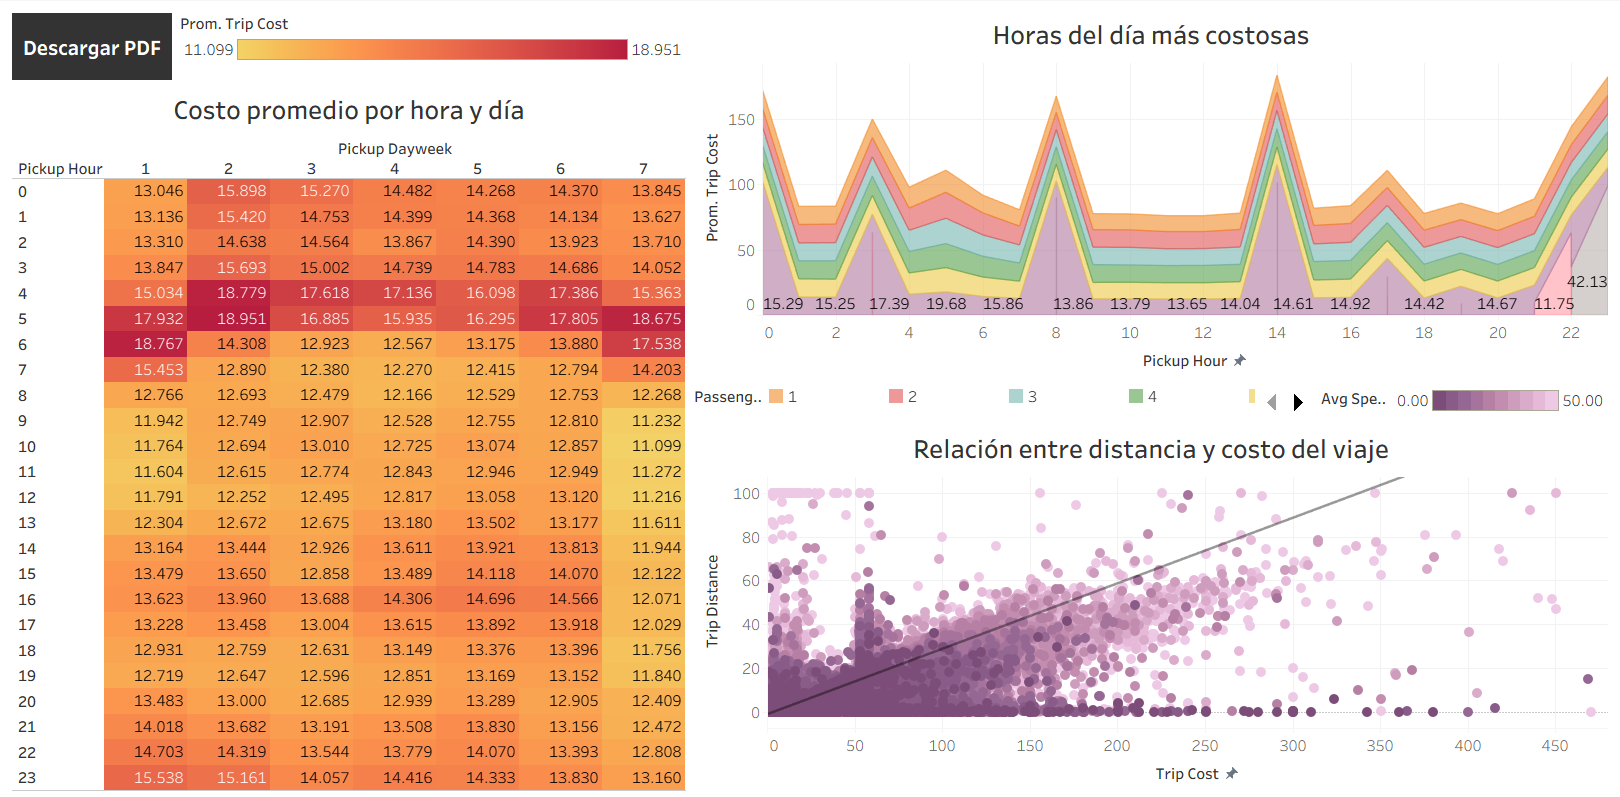

##**6. Prueba tu modelo con un conjunto de datos y realiza algunas predicciones.**

###**Predicciones en dataset de prueba**

 Ahora una vez entrenado el modelo, hay que ponerlo a prueba y esto lo hacemos en el modo **evaluate** con `test_data` para que el modelo no entrene sino haga predicciones con el dataset que le damos.

In [ ]:
prediction_result = model.evaluate(test_data)
prediction_result.predictions.show()

+--------------------+---------+------------------+
|Independent features|trip_cost|        prediction|
+--------------------+---------+------------------+
|(11,[0,1,6,7,9,10...|      3.3| 5.229415612797631|
|(11,[0,1,6,7,9,10...|      5.8|6.3303358257016225|
|(11,[0,1,6,7,9,10...|      5.8| 7.118369818870002|
|(11,[0,1,6,7,9,10...|      6.3| 7.601738837810181|
|(11,[0,1,6,7,9,10...|      5.8| 7.540577679207445|
|(11,[0,1,6,7,9,10...|      5.8| 7.594418474843022|
|(11,[0,1,6,7,9,10...|      5.8| 7.857899429637914|
|(11,[0,1,6,7,9,10...|      7.3| 7.508823026475898|
|(11,[0,1,6,7,9,10...|      5.8| 7.831017844178095|
|(11,[0,1,6,7,9,10...|      6.3|  7.83367689727065|
|(11,[0,1,6,7,9,10...|      6.3|7.9127986715162395|
|(11,[0,1,6,7,9,10...|      6.8| 8.373132947735213|
|(11,[0,1,6,7,9,10...|      7.5| 8.568519094868925|
|(11,[0,1,6,7,9,10...|      8.8|  8.62533187836518|
|(11,[0,1,6,7,9,10...|      6.8| 8.617515947633441|
|(11,[0,1,6,7,9,10...|      6.3|  8.61558692759141|
|(11,[0,1,6,

###**Metricas para saber como fue el desempeño de las predicciones**

Aqui desplegamos las metricas que nos permiten saber el desempeño del modelo en predicciones de nuevos valores:
- % del comportamiento del target que podemos representar con este modelo
- Error que tuvo en las predicciones para el set de prueba (valores nuevos que el modelo no ha visto)

In [ ]:
# Mostrar resultados
print(f"R²: {prediction_result.r2:.4f}")
print(f"R² ajustado: {prediction_result.r2adj:.4f}")
print(f"Mean Absolute Error: {prediction_result.meanAbsoluteError:.2f}")
print(f"Mean Squared Error: {prediction_result.meanSquaredError:.2f}")

R²: 0.8928
R² ajustado: 0.8928
Mean Absolute Error: 1.52
Mean Squared Error: 11.89


En este caso podemos ver las siguientes metricas en el modelo:
- `R²: 0.8928` indica que el modelo predijo el comportamiento de **trip_cost** en un 89.28%
- `Mean Squared Error: 11.89` lo que indica que este modelo se llega a equivocar un 11.89% en las predicciones que hizo durante el entrenamiento.

Al final el error se ve un poco grande pero un modelo con esta R² representa un buen modelo de prediccion.